# <center>Восканян Юрий, КИ22-17/1б</center>
# <center>Тема 1. Разведочный анализ данных</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Мы будем работать с данными [Titanic](https://www.kaggle.com/c/titanic): он содержит информацию о пассажирах корабля, включая их демографические характеристики и выжил пассажир или нет.

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [2]:
data = pd.read_csv('titanic.csv',
                  index_col='PassengerId')

## Описание данных

**Обучающий набор содержит признак Survived для каждого пассажира, обозначающий, выжил данный пассажир или нет (0 для умерших, 1 для выживших).**

**Каждая строчка наборов данных содержит следующие поля:**

**Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);**

**Name — имя;**

**Sex — пол;**

**Age — возраст;**

**SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;**

**Parch — количество родителей, детей (в том числе приемных) на борту титаника;**

**Ticket — номер билета;**

**Fare — плата за проезд;**

**Cabin — каюта;**

**Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).**

**Вывести размер таблицы**

In [3]:
print(data.size)

9801


**Данные представлены в виде таблицы. Вывести первые 5 строк:**

In [4]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Вывести описательную статистику**

In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Определите, сколько пассажиров выжило, а сколько - нет?**

In [6]:
number_of_survivors = (data['Survived'] == 1).sum()
death_toll = (data['Survived'] == 0).sum()
print(f'Количество выживших: {number_of_survivors}')
print(f'Количество погибших: {death_toll}')

Количество выживших: 342
Количество погибших: 549


**Правда ли, что пассажиры более высокого класса имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [7]:

grouped = data[data['Survived'] == 1].groupby('Pclass')
print(grouped['Survived'].count())

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


##### Исходя из результатов, можно сделать вывод, что пассажиры высокого класса имеют больше шансов на спасение

**Правда ли, что женщины имеют большие шансы на спасение?**

Для вычислений использовать groupby

In [8]:
grouped = data.groupby('Sex')
print(grouped['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


##### Действительно, женщины имеют больше шансов на спасение

**Cколько мужчин и женщин в каждом классе (Pclass)?**

Результаты представить в виде таблицы сопряженности.

In [9]:
cross_tab = pd.crosstab(data['Pclass'], data['Sex'])

cross_tab

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


**Вывести пассажиров, которые сели в Шербуре (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200). Отсортировать этих пассажиров по убыванию платы за билет.**

In [10]:
filtered_passengers = data[(data['Embarked'] == 'C') & (data['Fare'] > 200)]
sorted_passengers = filtered_passengers.sort_values(by='Fare', ascending=False)
sorted_passengers


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C


**Создать категориальный признак для заданных градаций возраста пассажира.**

In [12]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3
data['age_category'] = data['Age'].apply(age_category)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3


**Определить, сколько мужчин / женщин находилось на борту?**

In [13]:
number_of_men = (data['Sex'] == 'male').sum()
number_of_women = (data['Sex'] == 'female').sum()
print(f'Количество мужчин : {number_of_men}')
print(f'Количество женщин : {number_of_women}')

Количество мужчин : 577
Количество женщин : 314


**Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Определить, сколько было мужчин 2-го класса**

In [14]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [15]:
data[data["Sex"] == "male"]['Pclass'].value_counts()

Pclass
3    347
1    122
2    108
Name: count, dtype: int64

In [16]:
data[data["Sex"] == "female"]['Pclass'].value_counts()

Pclass
3    144
1     94
2     76
Name: count, dtype: int64

**Определите, какова доля выживших пассажиров из класса 3? А пассажиров из класса 1?**

In [20]:
count_in_class_1 = data[(data['Pclass'] == 1)]['Survived'].count()
count_in_class_3 = data[(data['Pclass'] == 3)]['Survived'].count()
number_of_passengers = data['Name'].count()
survived_3 = data[(data['Pclass'] == 3) & (data['Survived'] == 1)]['Survived'].count()
survived_1 = data[(data['Pclass'] == 1) & (data['Survived'] == 1)]['Survived'].count()
share_survived_3 = (survived_3 / count_in_class_3) * 100
share_survived_1 = (survived_1 / count_in_class_1) * 100
print(f'Доля выживших из класса 3: {share_survived_3:.2f} %')
print(f'Доля выживших из класса 1: {share_survived_1:.2f} %')

Доля выживших из класса 3: 24.24 %
Доля выживших из класса 1: 62.96 %


**Определить медиану и стандартное отклонение платежей (`Fare`). Округлить до 2 десятичных знаков.**

In [21]:
median = data['Fare'].median()
std = data['Fare'].std()

print(f'Медиана: {median:.2f}')
print(f'Стандартное отклонение: {std:.2f}')

Медиана: 14.45
Стандартное отклонение: 49.69


**Проверить, что люди моложе 30 лет выживают чаще, чем люди старше 60 лет. Определить доли выживших в обеих группах**

In [27]:
count_less_30 = data[(data['Age'] < 30)]['Survived'].count()
count_older_60 = data[(data['Age'] > 60)]['Survived'].count()
survived_less_30 = data[(data['Age'] < 30) & (data['Survived'] == 1)]['Survived'].count()
survived_older_60 = data[(data['Age'] > 60) & (data['Survived'] == 1)]['Survived'].count()
share_survived_less_30 = (survived_less_30 / count_less_30) * 100
share_survived_older_60 = (survived_older_60 / count_older_60) * 100
print(f'Доля выживших, кто моложе 30: {share_survived_less_30:.2f} %')
print(f'Доля выживших, кто старше 60: {share_survived_older_60:.2f} %')

Доля выживших, кто моложе 30: 40.62 %
Доля выживших, кто старше 60: 22.73 %


##### Из статистики видно, что люди, которые  моложе 30 лет, выживают чаще тех, кому больше 60 лет

**Проверить, что женщины выживают чаще мужчин. Определить доли выживших в обеих группах**

In [32]:
count_of_female = data[(data['Sex'] == 'female')]['Name'].count()
count_of_male = data[(data['Sex'] == 'male')]['Name'].count()
female_survived = data[(data['Sex'] == 'female') & (data['Survived'] == 1)]['Survived'].count()
male_survived = data[(data['Sex'] == 'male') & (data['Survived'] == 1)]['Survived'].count()
share_female_survived = (female_survived / count_of_female) * 100
share_male_survived = (male_survived / count_of_male) * 100
print(f'Доля выживших женщин: {share_female_survived:.2f} %')
print(f'Доля выживших мужчин: {share_male_survived:.2f} %')

Доля выживших женщин: 74.20 %
Доля выживших мужчин: 18.89 %


**Найдите самое популярное имя среди пассажиров Титаника мужского пола**

In [118]:
male_names = data[(data['Sex'] == 'male')]['Name'].value_counts()
print(male_names.idxmax())

Name
Braund, Mr. Owen Harris              1
Maisner, Mr. Simon                   1
Lindell, Mr. Edvard Bengtsson        1
Karaic, Mr. Milan                    1
Daniel, Mr. Robert Williams          1
                                    ..
McCoy, Mr. Bernard                   1
Johnson, Mr. William Cahoone Jr      1
Williams, Mr. Howard Hugh "Harry"    1
Allison, Master. Hudson Trevor       1
Dooley, Mr. Patrick                  1
Name: count, Length: 577, dtype: int64

**Определить, как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания. Выберать верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [101]:
mean_male_age_class_1 = data[(data['Sex'] == 'male') & (data['Pclass'] == 1)]['Age'].mean()
mean_male_age_class_2 = data[(data['Sex'] == 'male') & (data['Pclass'] == 2)]['Age'].mean()
mean_male_age_class_3 = data[(data['Sex'] == 'male') & (data['Pclass'] == 3)]['Age'].mean()
print(f'Средний возраст мужчин в классе 1: {mean_male_age_class_1:.2f}')
print(f'Средний возраст мужчин в классе 2: {mean_male_age_class_2:.2f}')
print(f'Средний возраст мужчин в классе 3: {mean_male_age_class_3:.2f}\n')

mean_female_age_class_1 = data[(data['Sex'] == 'female') & (data['Pclass'] == 1)]['Age'].mean()
mean_female_age_class_2 = data[(data['Sex'] == 'female') & (data['Pclass'] == 2)]['Age'].mean()
mean_female_age_class_3 = data[(data['Sex'] == 'female') & (data['Pclass'] == 3)]['Age'].mean()
print(f'Средний возраст женщин в классе 1: {mean_female_age_class_1:.2f}')
print(f'Средний возраст женщин в классе 2: {mean_female_age_class_2:.2f}')
print(f'Средний возраст женщин в классе 3: {mean_female_age_class_3:.2f}')

Средний возраст мужчин в классе 1: 41.28
Средний возраст мужчин в классе 2: 30.74
Средний возраст мужчин в классе 3: 26.51

Средний возраст женщин в классе 1: 34.61
Средний возраст женщин в классе 2: 28.72
Средний возраст женщин в классе 3: 21.75


##### Верные утверждения: 1, 3, 4

**Визуализируйте пропуски**

Используем библиотеку `missingno`

<Axes: >

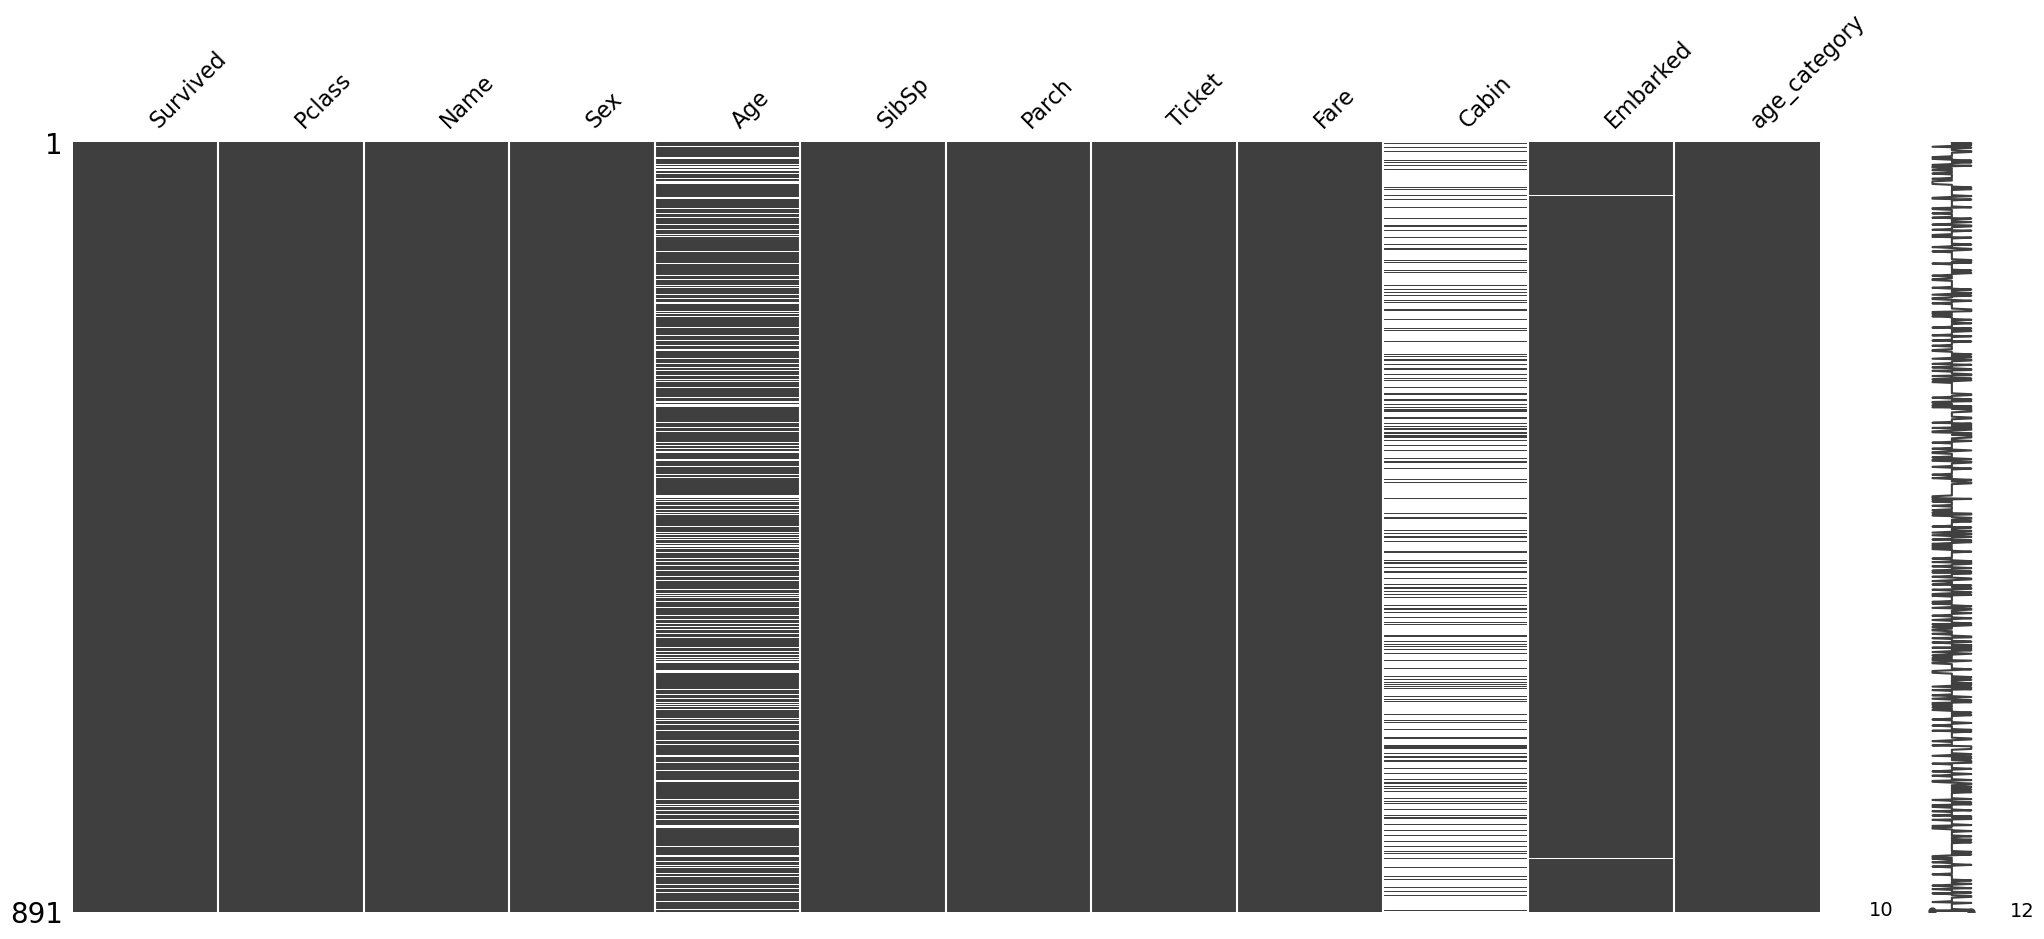

In [102]:
import missingno 
missingno.matrix(data)

**Выкинем признак Cabin. Столбец Age заполним медианным значением. Оставшиеся строки с пропусками удалим.**

<Axes: >

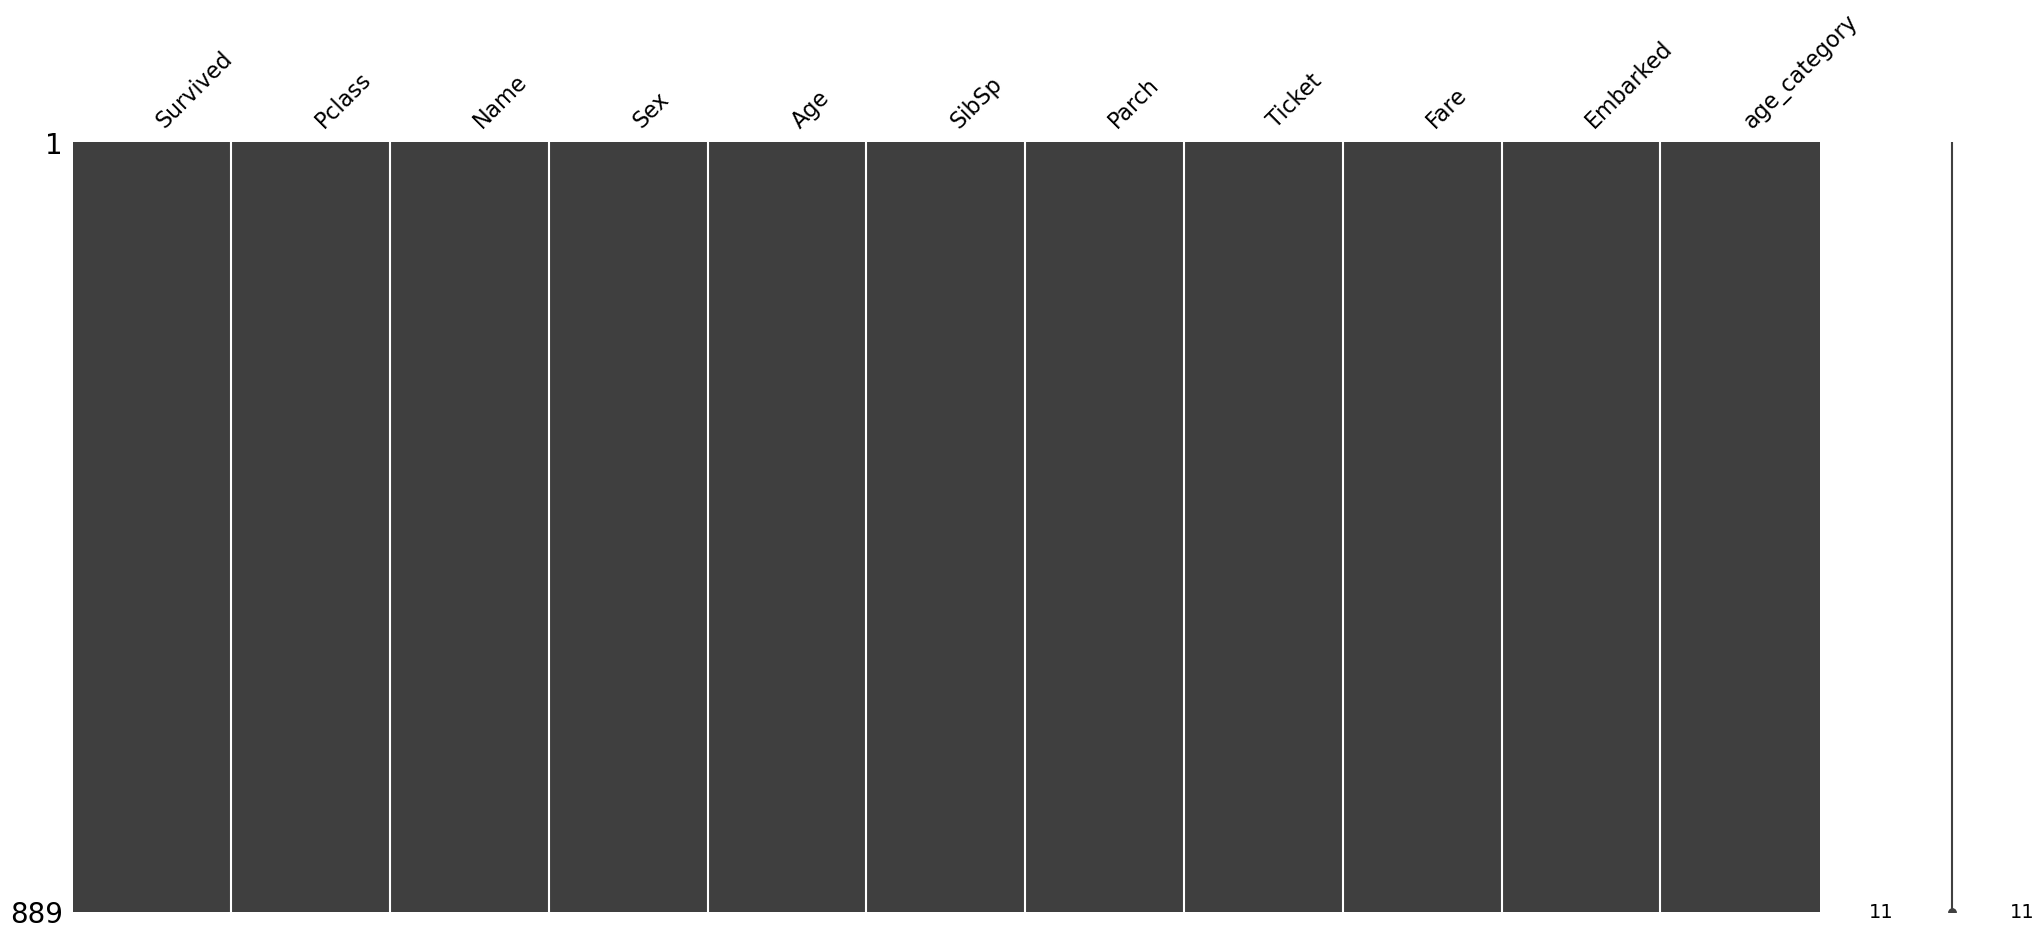

In [119]:
# !
# Удаление столбца Cabin
# del data['Cabin']

# Заполнение столбца Age медианным значением
mean_age = data['Age'].median()
data["Age"].fillna(mean_age, inplace=True)

# Удаление пропусков в столбце Age
data = data.dropna(subset=['Embarked'])

missingno.matrix(data)

**Для категориальных переменных построить столбчатую диаграмму**

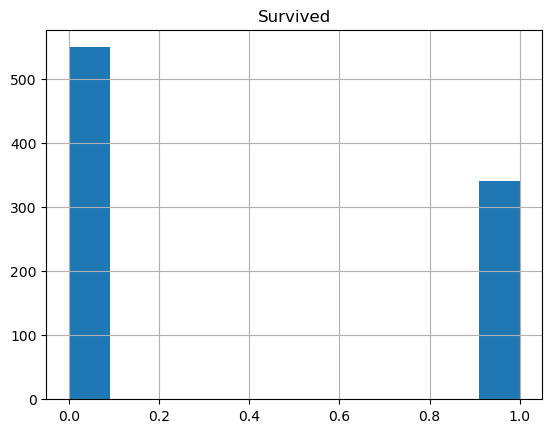

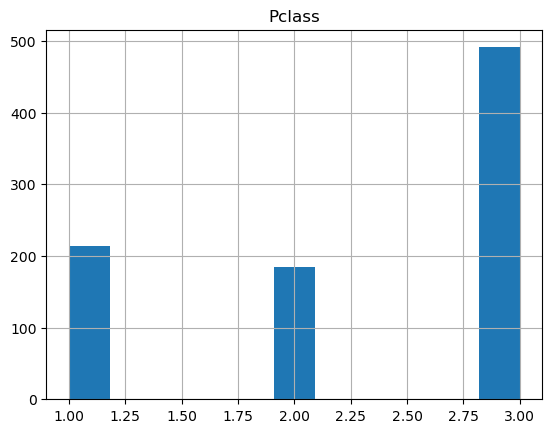

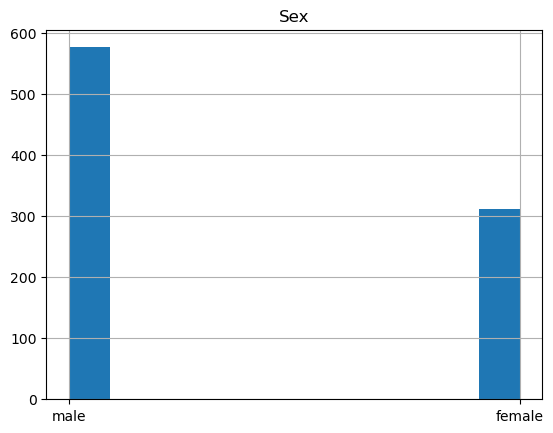

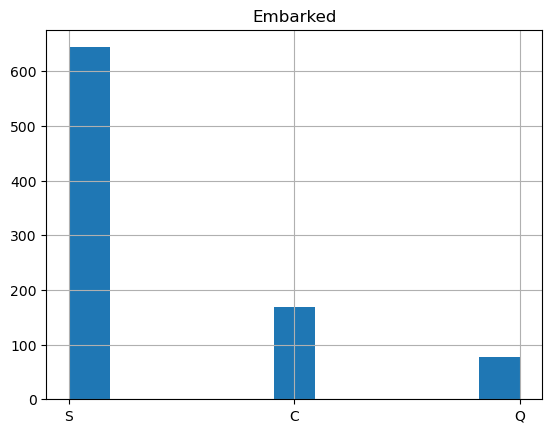

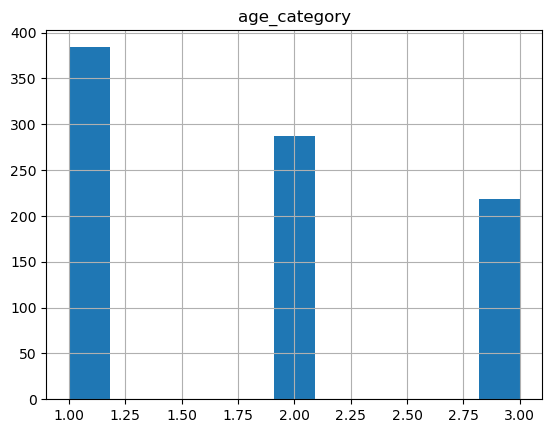

In [104]:
# Категориальные переменные: survived, pclass, sex, embarked, age_category
categories = ['Survived', 'Pclass', 'Sex', 'Embarked', 'age_category']
for category in categories:
    data[category].hist(bins=1 + round(np.log2(data[category].count())))
    plt.title(category)
    plt.show()



**Постройте попарные зависимости (диаграммы рассеяния) для признаков Age, Fare, Pclass, Sex, SibSp, Parch, Embarked и Survived. (метод scatter_matrix Pandas или pairplot Seaborn).**

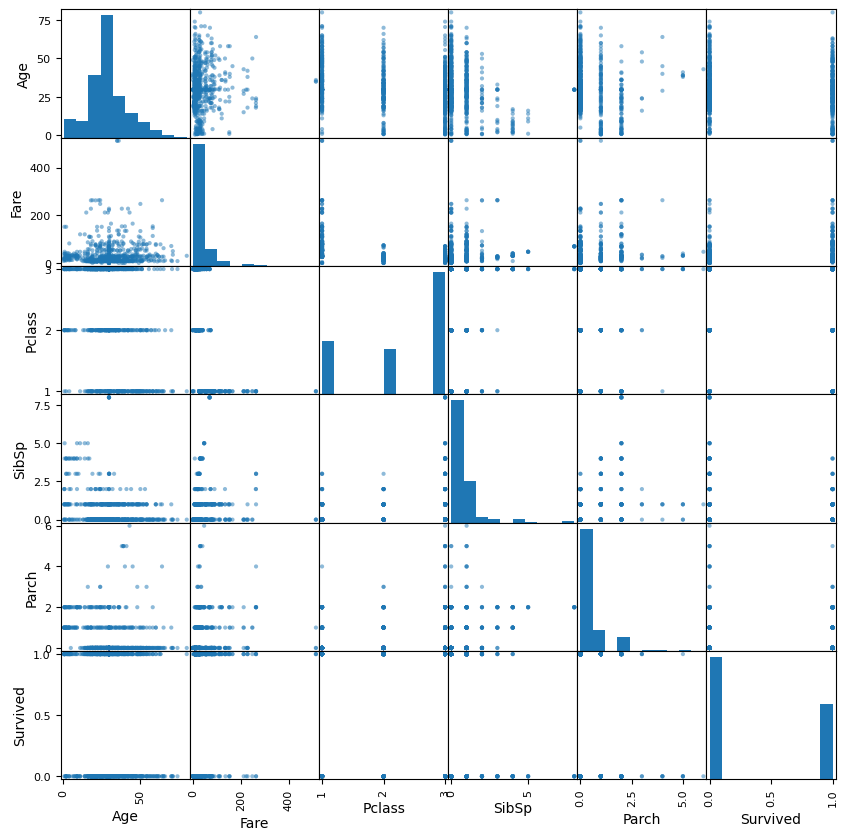

In [105]:
pd.plotting.scatter_matrix(data[['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']], figsize=(10, 10))
plt.show()

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


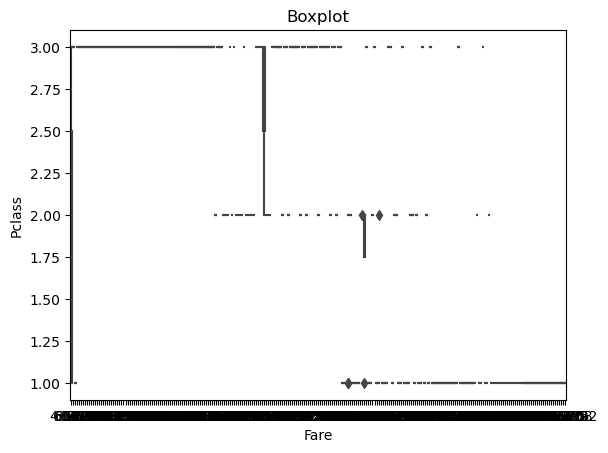

In [106]:
import seaborn
seaborn.boxplot(x='Fare', y='Pclass', data=data)
plt.title('Boxplot')
plt.xlabel('Fare')
plt.ylabel('Pclass')
plt.show()

**Такой boxplot получается не очень красивым из-за выбросов.**

**Опционально: создайте признак Fare_no_out (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости. Постройте boxplot.**

In [69]:
# train_df['Fare_no_out'] = tradata[data["Sex"] == "male"]['Pclass'].value_counts()in_df['Fare']
# fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
# fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
# fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
# fare_pclass1_no_out = # Ваш код здесь
# fare_pclass2_no_out = # Ваш код здесь
# fare_pclass3_no_out = # Ваш код здесь
# train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
#                                              .append(fare_pclass3_no_out)

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot (столбчатая диаграмма) c аргументом hue.**

c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

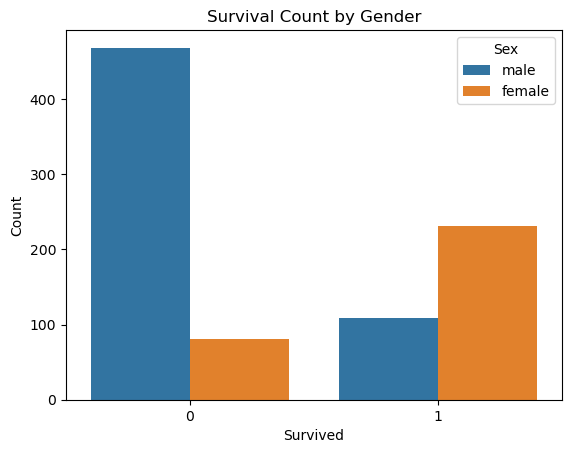

In [107]:
seaborn.countplot(x='Survived', hue='Sex', data=data)

plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.show()

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.** 

c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\yurav\.conda\envs\datescience\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

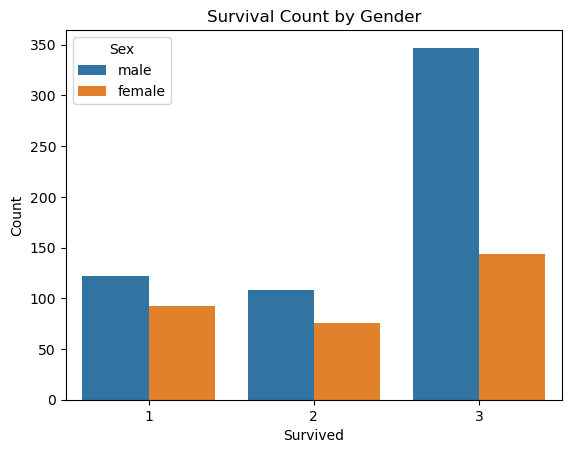

In [108]:
seaborn.countplot(x='Pclass', hue='Sex', data=data)

plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')

plt.show()

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

156 5


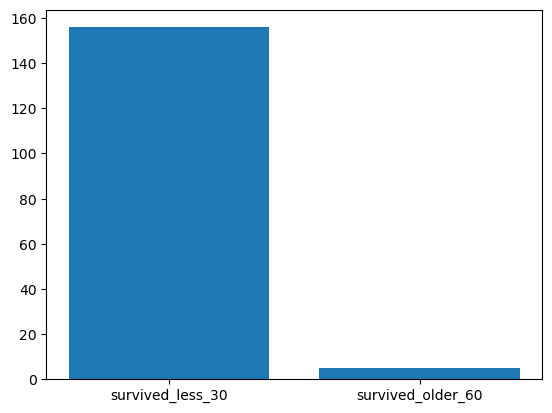

In [109]:
# survived_less_30 survived_less_60
print(survived_less_30, survived_older_60)
plt.bar(['survived_less_30', 'survived_older_60'], [survived_less_30, survived_older_60])
plt.show()

**Построить корреляционную матрицу. Выделить признаки, которые имень сильную корреляцию с целевой переменной**

In [110]:
print(data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr())

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.335549 -0.074673 -0.034040  0.083151  0.255290
Pclass   -0.335549  1.000000 -0.327954  0.081656  0.016824 -0.548193
Age      -0.074673 -0.327954  1.000000 -0.231875 -0.178232  0.088604
SibSp    -0.034040  0.081656 -0.231875  1.000000  0.414542  0.160887
Parch     0.083151  0.016824 -0.178232  0.414542  1.000000  0.217532
Fare      0.255290 -0.548193  0.088604  0.160887  0.217532  1.000000
